In [2]:
import numpy as np
import operator
import os,sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 

from pygam import LogisticGAM, s,f

# TensorFlow and tf.keras
import tensorflow as tf


In [3]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [4]:
per_call_df = pd.read_csv('/Users/benjaminmanning/Desktop/PAE/github/data/per_call_df.csv')
per_call_df = pd.read_csv('/Users/benjaminmanning/Desktop/PAE/github/data/time_fix.csv')
#per_call_df = per_call_df.sort_values(by='call_time', ascending=False)
per_call_df

,callerId,mean_call,mean_depth,content
0,8690,49.620,7.534,0
1,13512,80.167,9.333,0
2,14706,165.000,12.333,1
3,16066,86.667,12.167,0
4,20383,208.000,11.429,1
...,...,...,...,...
856,4872583,267.250,17.625,1
857,4882478,123.980,11.490,0
858,4884892,256.385,18.385,0
859,4889349,78.643,9.368,1


In [5]:
per_call_df

,callerId,mean_call,mean_depth,content
0,8690,49.620,7.534,0
1,13512,80.167,9.333,0
2,14706,165.000,12.333,1
3,16066,86.667,12.167,0
4,20383,208.000,11.429,1
...,...,...,...,...
856,4872583,267.250,17.625,1
857,4882478,123.980,11.490,0
858,4884892,256.385,18.385,0
859,4889349,78.643,9.368,1


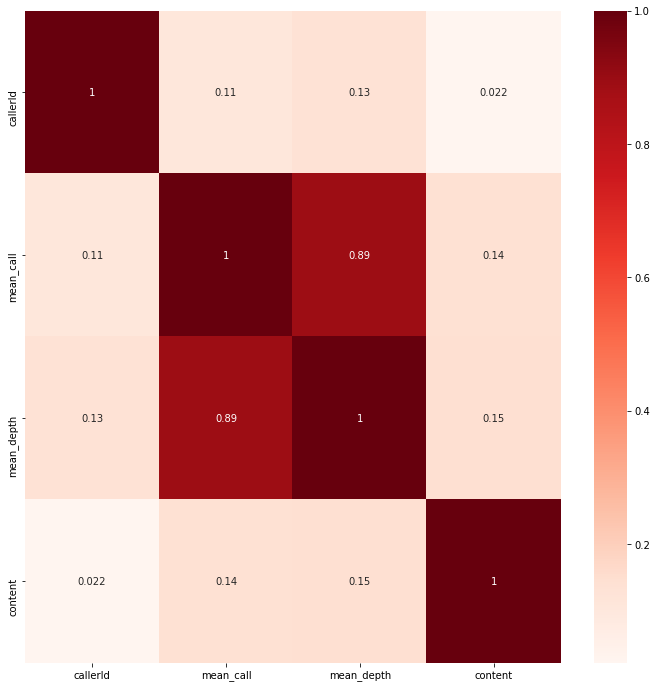

In [6]:
plt.subplots(figsize=(12, 12))
corr_matrix = per_call_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Reds") 
plt.show()

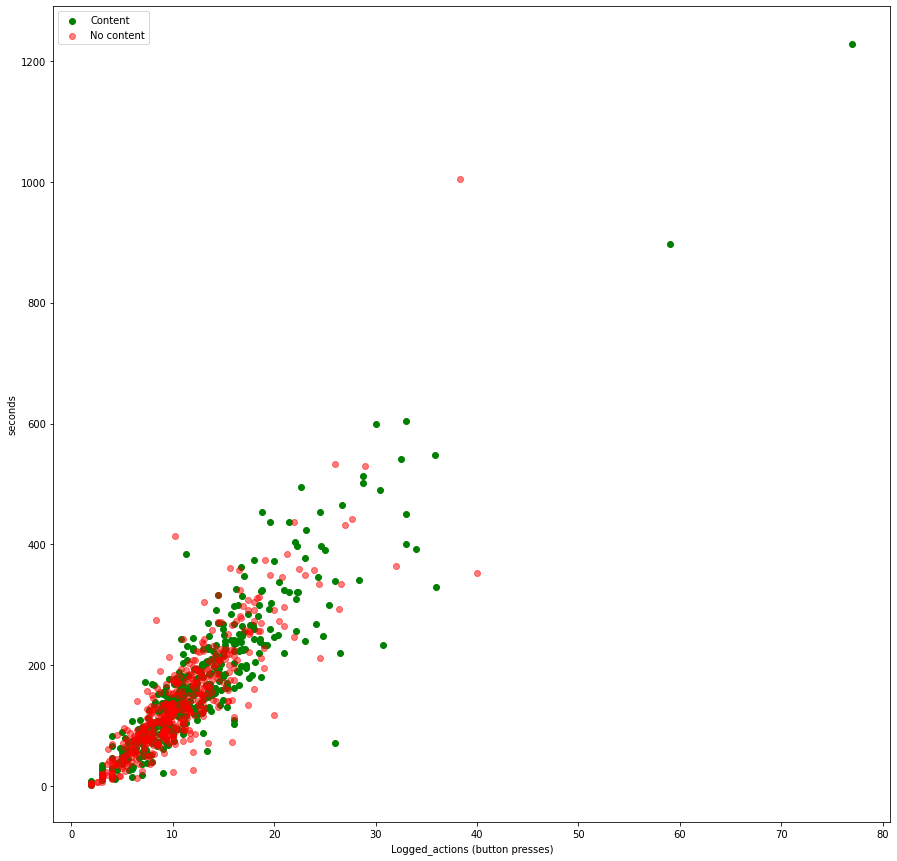

In [7]:
plt.figure(figsize=(15,15))
no_content = per_call_df[per_call_df['content']==0]
content = per_call_df[per_call_df['content']==1]
plt.scatter(content['mean_depth'],content['mean_call'], c='g',label = 'Content')
plt.scatter(no_content['mean_depth'], no_content['mean_call'], c='r', alpha = .5, label = 'No content')
plt.xlabel('Logged_actions (button presses)')
plt.ylabel('seconds')
plt.legend()



In [10]:
log_reg = sm.Logit(ytrain, Xtrain).fit() 

NameError: name 'ytrain' is not defined

In [8]:
#x = per_call_df[['call_time','caller_lifetime','con_replay', 'depth','year','day','noCallsMade', 'last_year','noContentListened']]
per_call_df['mean_call'] = per_call_df['mean_call']
x = per_call_df[['mean_call', 'mean_depth']]
y = per_call_df['content']

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)
x_train_int = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(x_train)
x_test_int = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(x_test)


#x_train = x_train.sort_values(by='call_time')
#x_test = x_test.sort_values(by='call_time')
#no_content[['call_time','caller_lifetime', 'depth','year','day','noCallsMade', 'last_year','noContentListened']]

In [12]:
log_reg = Lo.Logit(y_train, x_train).fit() 
print(log_reg.summary())
y_pred = log_reg.predict(x_test)
#log_reg.score(x_test,y_test)

NameError: name 'Lo' is not defined

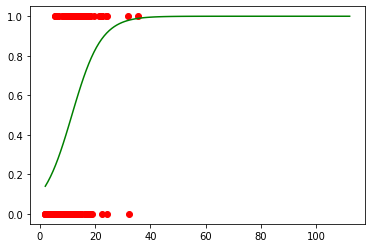

In [76]:
#model = LogisticRegression(penalty='none', max_iter=10000)
x_values = pd.DataFrame(np.linspace(2,112, 120))
model = LogisticRegression()
model = model.fit(x_train[['mean_depth']], y_train)
y_pred_test = model.predict_proba(x_values)[:,1]
x_values = np.linspace(2,112, 120)
plt.scatter(x_test['mean_depth'],y_test, c='r')
plt.plot(x_values,y_pred_test, c='g')

The test accuracy is  0.543
The train accuracy is  0.567


Text(0, 0.5, 'button presses')

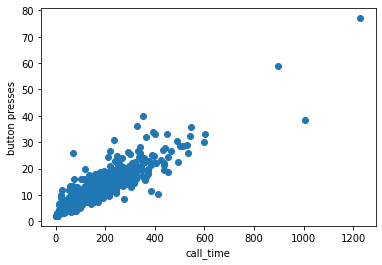

In [9]:
## Report the $MSE$ and $R^2$ from the training and test sets.

# Test MSE and R-squared
model = LogisticRegression()
model = model.fit(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print(f'The test accuracy is {test_accuracy: .3f}')
#print(f"The R-squared for the test data is {r2_score(y_test, y_pred_test): .3f}")

# Train MSE and R-squared
train_accuracy = model.score(x_train, y_train)
print(f'The train accuracy is {train_accuracy: .3f}')
#print(f"The R-squared for the training data is {r2_score(y_train, y_pred_train): .3f}")
plt.scatter(x['mean_call'],x['mean_depth'])
plt.xlabel('call_time')
plt.ylabel('button presses')

In [10]:
#getting the c values
C_list = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
val_list = []
train_list = []

#cross validating over C values
for C in C_list:
    #fit the model
    logit_lasso = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=5000)
    cv_accuracy = cross_validate(logit_lasso, x_train_int, y_train, cv=3, scoring="accuracy", return_train_score=True)
    
    #get the accuracies
    val_list.append((abs(cv_accuracy['test_score'])).mean())
    train_list.append((abs(cv_accuracy['train_score'])).mean())

([0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
 [0.4883741535345864,
  0.4883741535345864,
  0.5581925194607936,
  0.5596354661097399,
  0.5509208277957093,
  0.5523764318714006,
  0.5509208277957093],
 [0.48837260927337134,
  0.4949085569857896,
  0.5610545042859453,
  0.5683293534136928,
  0.5668721637126467,
  0.5683230109122738,
  0.5697770293626103])

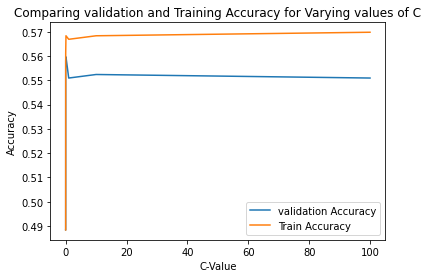

In [11]:
#plotting the accuracies
plt.plot(C_list,val_list, label = 'validation Accuracy')
plt.plot(C_list,train_list, label = 'Train Accuracy')
plt.xlabel("C-Value")
plt.ylabel("Accuracy")
plt.title('Comparing validation and Training Accuracy for Varying values of C')
plt.legend()
C_list,val_list,train_list

plt.hist(y_pred_test)
plt.xlabel('predicted outcome probability')

In [14]:
model = tf.keras.models.Sequential(name='FCN')

n_hidden = 100

# The number of nodes in the input layer (features)
n_input = 2

# The number of nodes in the output layer
n_output = 1

#regularizer

model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_input, name='hidden_1'))
model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_hidden, name='hidden_2'))
model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_hidden, name='hidden_3'))
model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_hidden, name='hidden_4'))

model.add(tf.keras.layers.Dense(n_output, activation = 'sigmoid',bias_regularizer='l1', name='output'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# compile it and run it
history = model.fit(x_train.values,y_train.values, epochs=50,verbose=0, validation_split=.2)

Text(0.5, 0.98, 'NN_model Training')

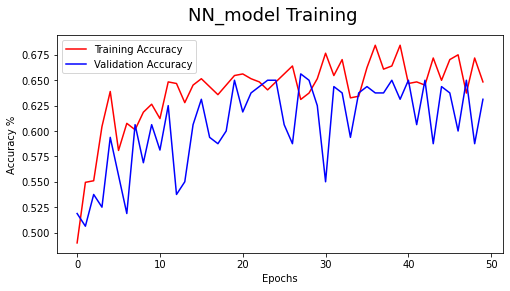

In [16]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(history.history['accuracy'],'r',label = 'Training Accuracy')
ax.plot(history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy %');
fig.suptitle('NN_model Training', fontsize = 18)

In [12]:
depths = list(range(1, 25))

def calc_meanstd(X_train, y_train,X_test,y_test, depths):
    # your code here
    
    #initiate the lists
    train_scores = []
    cvmeans = []
    cvstds = []
    test_scores = []
    
    #Iterate through the depths
    for d in depths:
        #Initialize the Decision tree model and fit the training data
        model1_1 = DecisionTreeClassifier(max_depth=d).fit(X_train,y_train)
        #Append the training scores without cross_validation
        train_scores.append(model1_1.score(X_train,y_train))
        test_scores.append(model1_1.score(X_test,y_test))
        
        
        #Repeat with Cross Validation
        scores = cross_val_score(estimator = model1_1, X=X_train, y=y_train, cv=5)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
    
    # end of your code here
    return cvmeans, cvstds, train_scores, test_scores

cvmeans, cvstds, train_scores, test_scores= calc_meanstd(x_train_int, y_train,x_test_int,y_test, depths)

[0.5508720930232558,
 0.5697674418604651,
 0.5741279069767442,
 0.6075581395348837,
 0.6133720930232558,
 0.6409883720930233,
 0.6613372093023255,
 0.6947674418604651,
 0.7151162790697675,
 0.7427325581395349,
 0.7703488372093024,
 0.7892441860465116,
 0.8183139534883721,
 0.8444767441860465,
 0.8473837209302325,
 0.8706395348837209,
 0.8822674418604651,
 0.9156976744186046,
 0.936046511627907,
 0.9273255813953488,
 0.9476744186046512,
 0.9549418604651163,
 0.9680232558139535,
 0.9723837209302325]

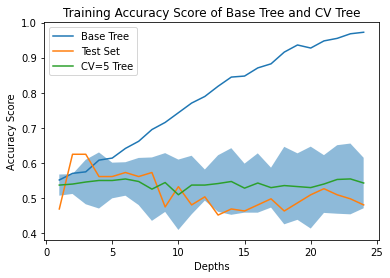

In [13]:
plt.plot(depths, train_scores, label = "Base Tree")
plt.plot(depths, test_scores, label = "Test Set")
plt.plot(depths, cvmeans, label = "CV=5 Tree")
plt.fill_between(depths, np.array(cvmeans) + 2*np.array(cvstds), np.array(cvmeans) - 2*np.array(cvstds), alpha = 0.5)
plt.xlabel("Depths")
plt.ylabel("Accuracy Score")
plt.title("Training Accuracy Score of Base Tree and CV Tree")
plt.legend()
train_scores

In [14]:
n_estimators = 75
tree_depth = 30

test_score = []
train_score =[]
cv_score = []
cvstds = []
depths = []

for i in range(tree_depth):
    depths.append(i)
    #Initiatilze and fit the Random Forest Classifier model
    model3_1 = RandomForestClassifier(n_estimators = n_estimators, max_depth = i+1, max_features = 'sqrt')
    model3_1.fit(x_train_int,y_train)

    #train score:
    random_forest_train_score = model3_1.score(x_train_int,y_train)
    train_score.append(random_forest_train_score)

    #test score:
    random_forest_test_score = model3_1.score(x_test_int,y_test)
    test_score.append(random_forest_test_score)
    
    #CV
    scores = cross_val_score(estimator = model3_1, X=x_train_int, y=y_train, cv=3)
    cv_score.append(scores.mean())
    cvstds.append(scores.std())

0.5465287007151446

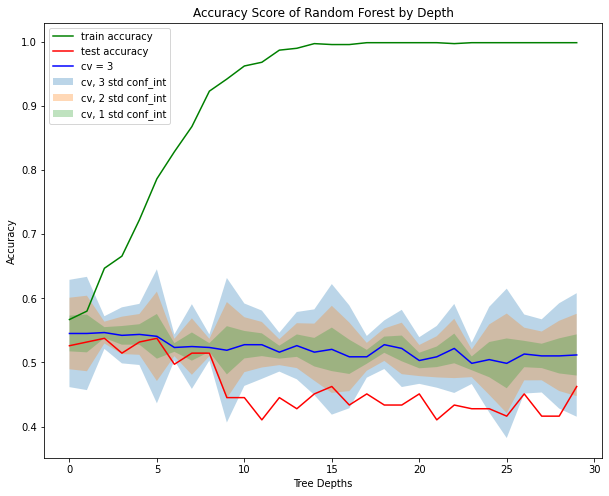

In [15]:
plt.subplots(figsize=(10,8))
plt.plot(depths,train_score, c='g',label='train accuracy')
plt.plot(depths,test_score, c='r',label='test accuracy')
plt.plot(depths,cv_score, c='b',label='cv = 3')
plt.fill_between(depths, np.array(cv_score) + 3*np.array(cvstds), np.array(cv_score) - 3*np.array(cvstds), alpha = 0.3,label = 'cv, 3 std conf_int')
plt.fill_between(depths, np.array(cv_score) + 2*np.array(cvstds), np.array(cv_score) - 2*np.array(cvstds), alpha = 0.3,label = 'cv, 2 std conf_int')
plt.fill_between(depths, np.array(cv_score) + np.array(cvstds), np.array(cv_score) - np.array(cvstds), alpha = 0.3,label = 'cv, 1 std conf_int')
plt.xlabel("Tree Depths")
plt.ylabel("Accuracy")
plt.title("Accuracy Score of Random Forest by Depth")
plt.legend()
max(cv_score)

In [16]:
model_rf = RandomForestClassifier(n_estimators = 75, max_depth = 3, max_features = 'sqrt')
model_rf.fit(x_train,y_train)
model_rf.score(x_test,y_test)

0.5317919075144508

In [17]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature mean_call (0.509503)
2. feature mean_depth (0.490497)


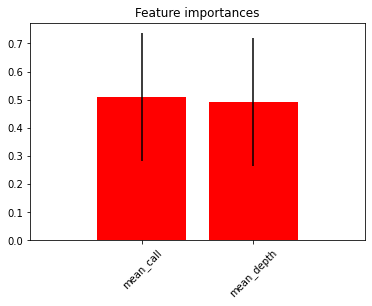

'mean_call'

In [21]:
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print(f"%d. feature {x_train.columns[f]} (%f)" % (f+1, importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns, rotation=45)
plt.xlim([-1, x_train.shape[1]])
plt.show()
x_train.columns[0]

In [23]:
model_rf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=176091699),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2068643649),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1342414863),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1948398644),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1119886795),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=50941169),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1597163810),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=120446848),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2025163899),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=161556461

In [24]:
from collections import Counter
top_predictors_rf = []
#MUST BE NUM FROM PREVIOUS
for i in range (75):
    top_predictors_rf.append(model_rf.estimators_[i].tree_.feature[0])
    
top_predictors_rf = pd.Series(top_predictors_rf)


#Use name of predictor instead of index
print("The top predictors for random forest is", x_train.columns[top_predictors_rf].values)

c = Counter(x_train.columns[top_predictors_rf].values)

print(c.most_common(6))

The top predictors for random forest is ['mean_call' 'mean_call' 'mean_call' 'mean_call' 'mean_depth' 'mean_depth'
 'mean_depth' 'mean_call' 'mean_call' 'mean_call' 'mean_depth' 'mean_call'
 'mean_call' 'mean_depth' 'mean_call' 'mean_depth' 'mean_depth'
 'mean_call' 'mean_call' 'mean_call' 'mean_depth' 'mean_depth'
 'mean_depth' 'mean_call' 'mean_depth' 'mean_depth' 'mean_depth'
 'mean_call' 'mean_depth' 'mean_call' 'mean_call' 'mean_call' 'mean_depth'
 'mean_depth' 'mean_call' 'mean_call' 'mean_depth' 'mean_call' 'mean_call'
 'mean_depth' 'mean_depth' 'mean_depth' 'mean_depth' 'mean_depth'
 'mean_call' 'mean_depth' 'mean_depth' 'mean_depth' 'mean_call'
 'mean_depth' 'mean_depth' 'mean_call' 'mean_call' 'mean_depth'
 'mean_call' 'mean_depth' 'mean_call' 'mean_depth' 'mean_depth'
 'mean_call' 'mean_depth' 'mean_call' 'mean_depth' 'mean_call'
 'mean_depth' 'mean_depth' 'mean_depth' 'mean_call' 'mean_depth'
 'mean_depth' 'mean_depth' 'mean_depth' 'mean_call' 'mean_call'
 'mean_depth']
[('

In [64]:
##GET POSITIVE AND NEGATIVE ACCURACIES

model_rf = RandomForestClassifier(n_estimators = 75, max_depth = 5, max_features = 'sqrt')
model_rf.fit(x_train,y_train)

y_test_pos = y_test[y_test==1]
x_test_pos = x_test.loc[y_test[y_test==1].index]

y_test_neg = y_test[y_test==0]
x_test_neg = x_test.loc[y_test[y_test==0].index]

model_rf.score(x_test_pos,y_test_pos), model_rf.score(x_test_neg,y_test_neg)


# content = content[['content','call_time','caller_lifetime','con_replay', 'depth','year','day','noCallsMade', 'last_year','noContentListened']]
# no_content = no_content[['content','call_time','caller_lifetime','con_replay', 'depth','year','day','noCallsMade', 'last_year','noContentListened']]
content = content[['content','mean_call','mean_depth']]
no_content = no_content[['content','mean_call','mean_depth']]

x_con = content.drop(['content'],axis=1)
y_con = content['content']
x_no = no_content.drop(['content'],axis=1)
y_no = no_content['content']

In [65]:
model_rf.score(x_test_pos,y_test_pos), model_rf.score(x_test_neg,y_test_neg)

(0.6893203883495146, 0.7010309278350515)

In [51]:
#getting k values
k_list = [1,2,3,4,5,6,7,8,9,10,15]
val_list = []
train_list = []

#running CV over the k values
for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_accuracy = cross_validate(knn_model, x_train, y_train, cv=5, scoring="accuracy", return_train_score=True)
    
    # Calculate MSE on both the test and training set for the model
    val_list.append((abs(cv_accuracy['test_score'])).mean())
    train_list.append((abs(cv_accuracy['train_score'])).mean())


([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
 [0.578435534591195,
  0.5784669811320754,
  0.6023191823899372,
  0.6011006289308176,
  0.6299764150943397,
  0.6073584905660377,
  0.6173977987421384,
  0.6086399371069182,
  0.6375471698113208,
  0.6375314465408805,
  0.6387106918238994])

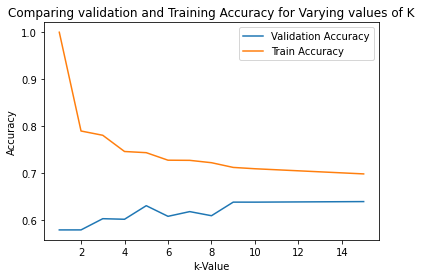

In [52]:
#plotting the training versus the validation accuracy
plt.plot(k_list,val_list, label = 'Validation Accuracy')
plt.plot(k_list,train_list, label = 'Train Accuracy')
plt.xlabel("k-Value")
plt.ylabel("Accuracy")
plt.title('Comparing validation and Training Accuracy for Varying values of K')
plt.legend()
k_list,val_list

In [54]:
#
logiGAM = LogisticGAM(s(0) + s(1)).fit(x_train,y_train)


In [55]:
lams = np.logspace(-3, 3, 30)
logiGAM.gridsearch(x_train, y_train, lam=lams)


N/A% (0 of 30) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/usr/local/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/usr/local/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
/usr/local/lib/python3.8/site-packages/pygam/pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  3% (1 of 30) |                         | Elapsed Time: 0:00:00 ETA:   0:00:04/usr/local/lib/python3.8/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/usr/local/lib/python3.8/site-packages/pygam/pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)

In [59]:
logiGAM.accuracy(x_test,y_test)

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False,

In [57]:
logiGAM.accuracy(x_train,y_train)

0.6649937264742786

In [41]:
logiGAM.lam

[[1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222],
 [1.2689610031679222]]